In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

In [8]:
df = pd.read_csv("C:/Users/hou60/Downloads/healthcare-dataset-stroke-data.csv")
print(df.head(5))
print('Data shape:',df.shape)
print('Data info', df.info)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Data shape: (5110, 12)
Data info <bound method DataFrame

In [9]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\hou60\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

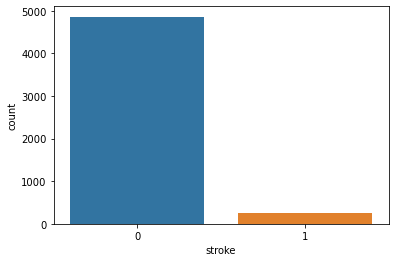

In [21]:
sns.countplot(df['stroke'])


In [22]:
stroke_num = len(df[df['stroke'] == 1])
print(f'Stroke rate:{round(stroke_num/len(df)*100,3)}%')

Stroke rate:4.873%


In [25]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [26]:
df.drop(columns=['id'], inplace=True)

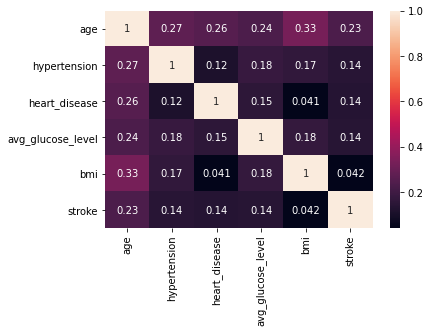

In [43]:
sns.heatmap(df.corr(), annot=True);

In [49]:
X = df.drop('stroke', axis = 1)

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencdoer = LabelEncoder()
df['gender']=labelencdoer.fit_transform(df['gender'])
df['ever_married']=labelencdoer.fit_transform(df['ever_married'])
df['work_type'].value_counts()
df


<ipython-input-56-592b9fffcb7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=labelencdoer.fit_transform(df['gender'])
<ipython-input-56-592b9fffcb7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=labelencdoer.fit_transform(df['ever_married'])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df = pd.get_dummies(df, columns=['gender', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status',], drop_first=True)

In [59]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,ever_married_1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [61]:
y=df['stroke'].ravel()
X = df.drop('stroke', axis=1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scale=scaler.fit_transform(X)
X_scale

array([[0.81689453, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.97558594, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.59716797, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42626953, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.62158203, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53613281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, shuffle=True, random_state=7)

In [67]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=7)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hou60\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982



<AxesSubplot:ylabel='count'>

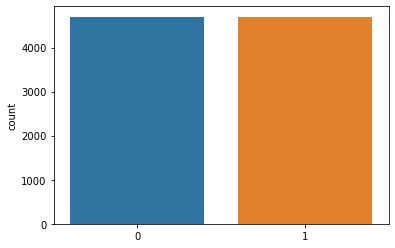

In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)
sns.countplot(x = y_oversampled, data = df)

In [88]:

X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 7)


In [91]:
lr = LogisticRegression()
lr.fit(X_train_re, y_train_re)
lr_pred = lr.predict(X_test_re)
print(confusion_matrix(lr_pred, y_test_re))
print(classification_report(lr_pred, y_test_re))

[[1241  189]
 [ 196 1194]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1430
           1       0.86      0.86      0.86      1390

    accuracy                           0.86      2820
   macro avg       0.86      0.86      0.86      2820
weighted avg       0.86      0.86      0.86      2820



C:\Users\hou60\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
dt = RandomForestClassifier()
dt.fit(X_train_re, y_train_re)
dt_pred = dt.predict(X_test_re)
print(confusion_matrix(dt_pred, y_test_re))
print(classification_report(dt_pred, y_test_re))

[[1365   54]
 [  72 1329]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1419
           1       0.96      0.95      0.95      1401

    accuracy                           0.96      2820
   macro avg       0.96      0.96      0.96      2820
weighted avg       0.96      0.96      0.96      2820



In [102]:
from sklearn.svm import SVC

svm_model= SVC()
svm_model.fit(X_train_re, y_train_re)
y_pred = svm_model.predict(X_test_re)

print(confusion_matrix(y_test_re, y_pred))
print(classification_report(y_test_re, y_pred))

[[1049  388]
 [ 258 1125]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1437
           1       0.74      0.81      0.78      1383

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820

